In [40]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#load dataset
df=pd.read_excel("C:\\Users\\ASUS\\Downloads\\clust.xlsx")

In [6]:
#load first five rows
df.head()

,Plant,CO2 Absorption Rate,Growth Habit,Leaf Surface Area,Leaf Structure,Tolerance to Pollution,Growth Rate
0,Agave,9,Succulent,Moderate,Thick,Moderate,Moderate
1,Common Ferns,7,Fern,High,Thin,High,Slow
2,Snake Plant,3,Succulent,Low,Thick,High,Slow
3,Peace Lily,1,Herbaceous,Low,Thin,Moderate,Slow
4,Spider Plant,3,Herbaceous,Moderate,Thin,High,Moderate


In [7]:
#load last five rows
df.tail()

,Plant,CO2 Absorption Rate,Growth Habit,Leaf Surface Area,Leaf Structure,Tolerance to Pollution,Growth Rate
99,Zebra Plant,2,Herbaceous,Low,Thin,High,Slow
100,Delphinium,4,Herbaceous,High,Thin,High,Moderate
101,Heather,3,Shrub,Low,Thin,Moderate,Slow
102,Baby Sun Rose,2,Herbaceous,Low,Thin,High,Slow
103,Cosmos,4,Herbaceous,High,Thin,High,Moderate


In [8]:
# rows, columns
df.shape

(104, 7)

In [9]:
# rows * columns
df.size

728

In [10]:
# columns names
df.columns

Index(['Plant', 'CO2 Absorption Rate', 'Growth Habit', 'Leaf Surface Area',
       'Leaf Structure', 'Tolerance to Pollution', 'Growth Rate'],
      dtype='object')

In [11]:
# information about the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Plant                   104 non-null    object
 1   CO2 Absorption Rate     104 non-null    int64 
 2   Growth Habit            104 non-null    object
 3   Leaf Surface Area       104 non-null    object
 4   Leaf Structure          104 non-null    object
 5   Tolerance to Pollution  104 non-null    object
 6   Growth Rate             104 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [12]:
# checking null values
df.isnull().sum()

Plant                     0
CO2 Absorption Rate       0
Growth Habit              0
Leaf Surface Area         0
Leaf Structure            0
Tolerance to Pollution    0
Growth Rate               0
dtype: int64

In [13]:
# checking duplicate values
df.duplicated().value_counts()

False    102
True       2
dtype: int64

In [14]:
# dropping duplicate values
df.drop_duplicates(inplace=True)

In [15]:
# confirming non-duplicates
df.shape

(102, 7)

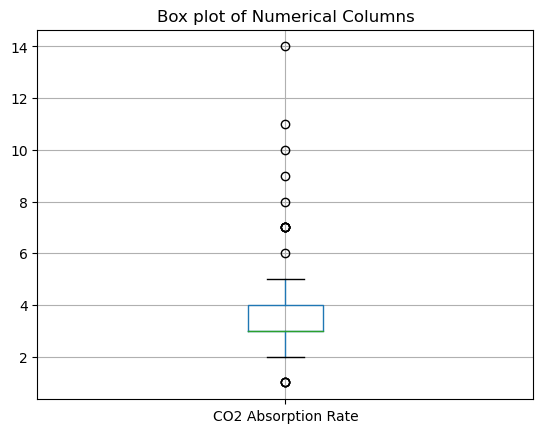

In [16]:
# checking outliers
df.boxplot('CO2 Absorption Rate')
plt.title('Box plot of Numerical Columns')
plt.show()

In [17]:
# removing outliers
df = df[(df['CO2 Absorption Rate'] >= 2) & (df['CO2 Absorption Rate'] <= 5)]

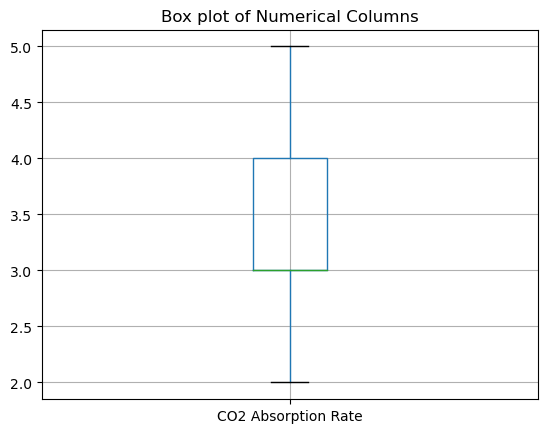

In [18]:
# confirming outliers removal
df.boxplot('CO2 Absorption Rate')
plt.title('Box plot of Numerical Columns')
plt.show()

In [19]:
# get statistical summary
df.describe()

,CO2 Absorption Rate
count,86.00
mean,3.31
std,0.97
min,2.00
25%,3.00
50%,3.00
75%,4.00
max,5.00


In [20]:
# checking unique values in each column
df.nunique()

Plant                     86
CO2 Absorption Rate        4
Growth Habit               8
Leaf Surface Area          3
Leaf Structure             3
Tolerance to Pollution     2
Growth Rate                3
dtype: int64

In [21]:
# resetting the numbering of index
df.reset_index(drop=True, inplace=True)

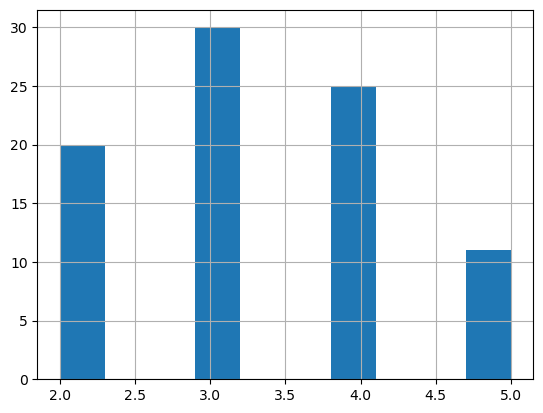

In [22]:
# visualizing co2 absorption rate
df['CO2 Absorption Rate'].hist()
plt.show()


Unique values and their frequencies for Growth Habit :
Herbaceous       65
Shrub             7
Herb              7
Climbing Vine     3
Succulent         1
Fern              1
Tree              1
Moss              1
Name: Growth Habit, dtype: int64


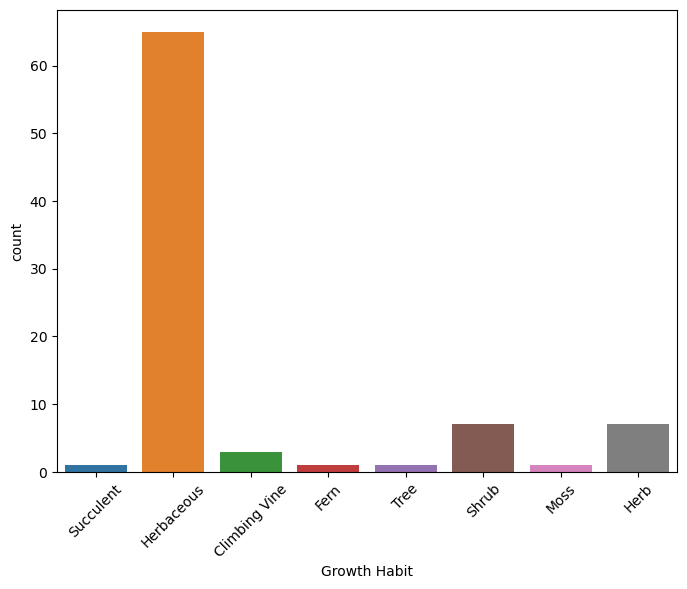


Unique values and their frequencies for Leaf Surface Area :
Low         53
High        19
Moderate    14
Name: Leaf Surface Area, dtype: int64


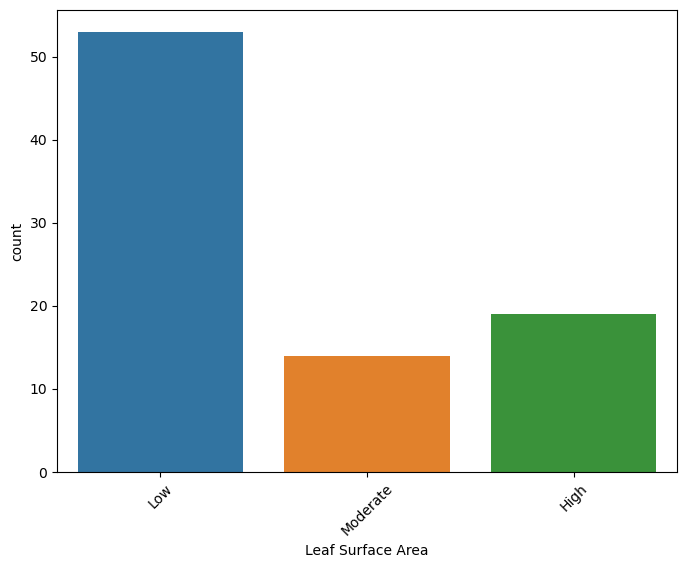


Unique values and their frequencies for Leaf Structure :
Thin        75
Thick        8
Moderate     3
Name: Leaf Structure, dtype: int64


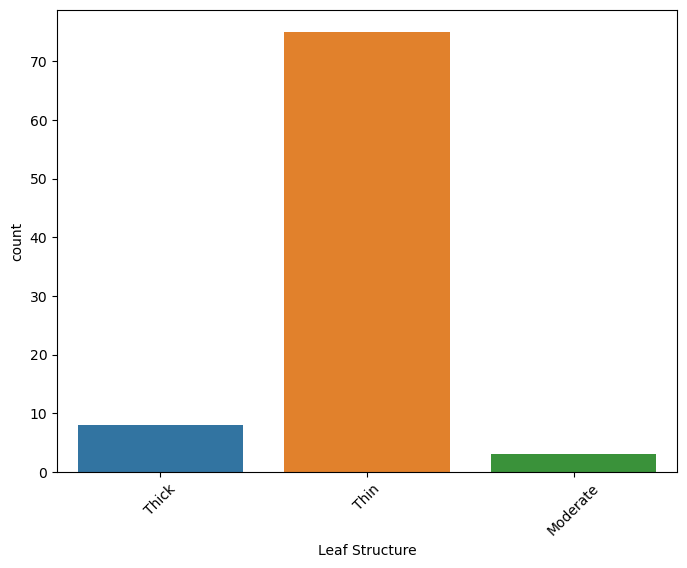


Unique values and their frequencies for Tolerance to Pollution :
High        57
Moderate    29
Name: Tolerance to Pollution, dtype: int64


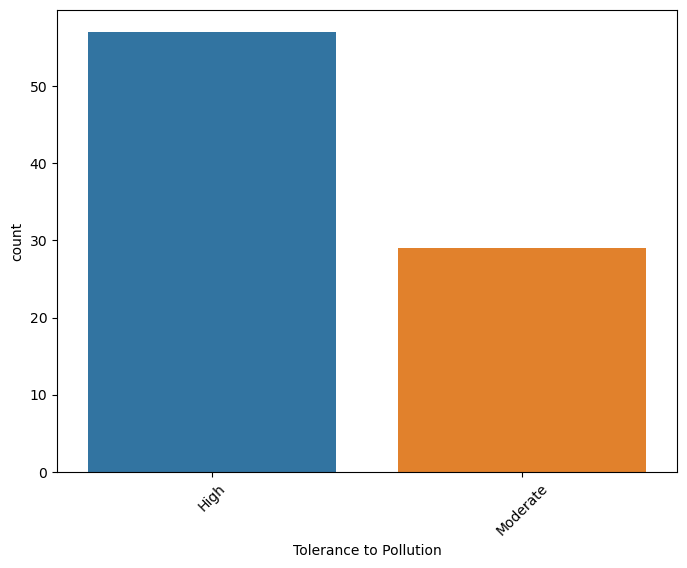


Unique values and their frequencies for Growth Rate :
Slow        53
Moderate    22
Fast        11
Name: Growth Rate, dtype: int64


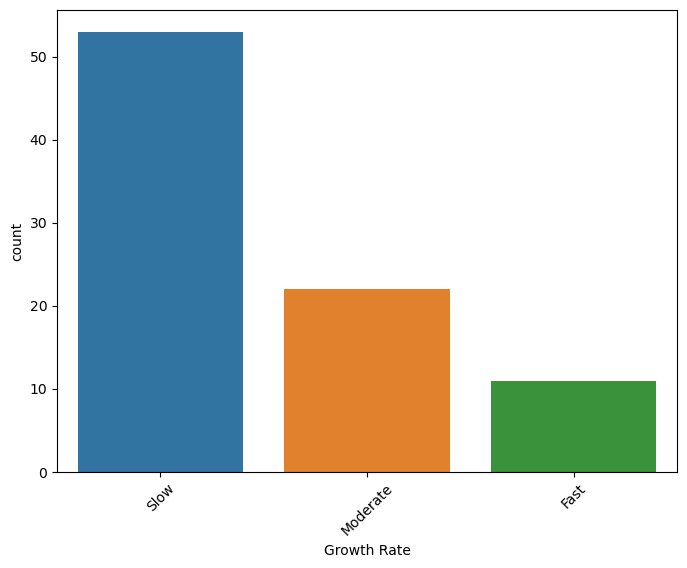

In [23]:
# visualizing columns such as growth habit, leaf surface area, leaf structure, tolerance to pollution and growth rate
categorical_cols = ['Growth Habit', 'Leaf Surface Area', 'Leaf Structure', 'Tolerance to Pollution', 'Growth Rate']
for col in categorical_cols:
    print("\nUnique values and their frequencies for", col, ":")
    print(df[col].value_counts())

    # Bar plot for categorical variables
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.show()

In [24]:
# feature engineering
# Identify the categorical columns
categorical_cols = ['Plant', 'Growth Habit', 'Leaf Surface Area', 'Leaf Structure', 'Tolerance to Pollution', 'Growth Rate']

# Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [71]:
df

,Plant,CO2 Absorption Rate,Growth Habit,Leaf Surface Area,Leaf Structure,Tolerance to Pollution,Growth Rate
0,70,3,6,1,1,0,2
1,73,3,3,2,2,0,1
2,27,5,0,0,0,0,0
3,9,5,1,0,2,0,2
4,24,5,7,2,1,0,0
...,...,...,...,...,...,...,...
81,84,2,3,1,2,0,2
82,23,4,3,0,2,0,1
83,34,3,5,1,2,1,2
84,3,2,3,1,2,0,2


In [75]:
# splitting of dataset into X and y
X = df.drop('Growth Rate', axis=1)
y = df['Growth Rate']

In [76]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=4)  # Select top 4 features (adjust k as needed)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the column names of the selected features from the original dataset
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['CO2 Absorption Rate', 'Leaf Surface Area', 'Leaf Structure',
       'Tolerance to Pollution'],
      dtype='object')


In [31]:
# splitting of dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [34]:
# Create and train the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the model performance summary
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.96it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
XGBClassifier                      0.78               0.70    None      0.76   
RandomForestClassifier             0.78               0.70    None      0.76   
ExtraTreesClassifier               0.78               0.70    None      0.76   
AdaBoostClassifier                 0.72               0.66    None      0.72   
DecisionTreeClassifier             0.72               0.66    None      0.72   
ExtraTreeClassifier                0.72               0.66    None      0.72   
LabelPropagation                   0.72               0.66    None      0.72   
LabelSpreading                     0.72               0.66    None      0.72   
Perceptron                         0.72               0.65    None      0.70   
KNeighborsClassifier               0.72               0.62    None      0.68   
BaggingClassifier                  0.67 

In [41]:
# fitting the training set into top 3 classifiers: randomforest, xgboost and extratrees
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

extra_trees_model = ExtraTreesClassifier()
extra_trees_model.fit(X_train, y_train)

xgb_y_pred = xgb_model.predict(X_test)
rf_y_pred = rf_model.predict(X_test)
extra_trees_y_pred = extra_trees_model.predict(X_test)

# checking confusion matrix and classification report of all 3 classifiers
print("XGBoost Classifier:")
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
print(xgb_cm)
print(classification_report(y_test, xgb_y_pred))

print("Random Forest Classifier:")
rf_cm = confusion_matrix(y_test, rf_y_pred)
print(rf_cm)
print(classification_report(y_test, rf_y_pred))

print("Extra Trees Classifier:")
extra_trees_cm = confusion_matrix(y_test, extra_trees_y_pred)
print(extra_trees_cm)
print(classification_report(y_test, extra_trees_y_pred))

XGBoost Classifier:
[[2 1 1]
 [1 3 1]
 [0 0 9]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.75      0.60      0.67         5
           2       0.82      1.00      0.90         9

    accuracy                           0.78        18
   macro avg       0.74      0.70      0.71        18
weighted avg       0.77      0.78      0.76        18

Random Forest Classifier:
[[2 0 2]
 [1 2 2]
 [0 0 9]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       1.00      0.40      0.57         5
           2       0.69      1.00      0.82         9

    accuracy                           0.72        18
   macro avg       0.79      0.63      0.65        18
weighted avg       0.77      0.72      0.69        18

Extra Trees Classifier:
[[2 1 1]
 [1 3 1]
 [0 0 9]]
              precision    recall  f1-score   support

           0       0.67      

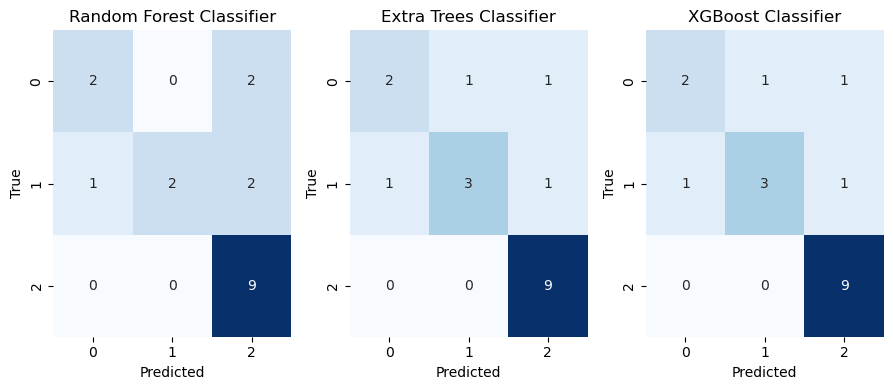

In [43]:
# visualizing confusion matrix of all 3 top classifiers
plt.figure(figsize=(12, 4))

plt.subplot(141)
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(142)
sns.heatmap(extra_trees_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Extra Trees Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(143)
sns.heatmap(xgb_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [61]:
print("Random Forest:")
# Feature importances
importance = rf_model.feature_importances_
for i in range(len(importance)):
    print(f"Feature {i}: {importance[i]}")
print()

print("XGBoost:")
# Feature importances
importance = xgb_model.feature_importances_
for i in range(len(importance)):
    print(f"Feature {i}: {importance[i]}")
print()

print("Extra Trees:")
# Feature importances
importance = extra_trees_model.feature_importances_
for i in range(len(importance)):
    print(f"Feature {i}: {importance[i]}")
print()

Random Forest:
Feature 0: 0.5469516134956479
Feature 1: 0.24932797317571181
Feature 2: 0.106955563974054
Feature 3: 0.09676484935458637

XGBoost:
Feature 0: 0.6103460192680359
Feature 1: 0.11636998504400253
Feature 2: 0.10030073672533035
Feature 3: 0.172983318567276

Extra Trees:
Feature 0: 0.20907050195780086
Feature 1: 0.3780602630542599
Feature 2: 0.08105326998268463
Feature 3: 0.21614678537434875
Feature 4: 0.05109476164794808
Feature 5: 0.06457441798295786



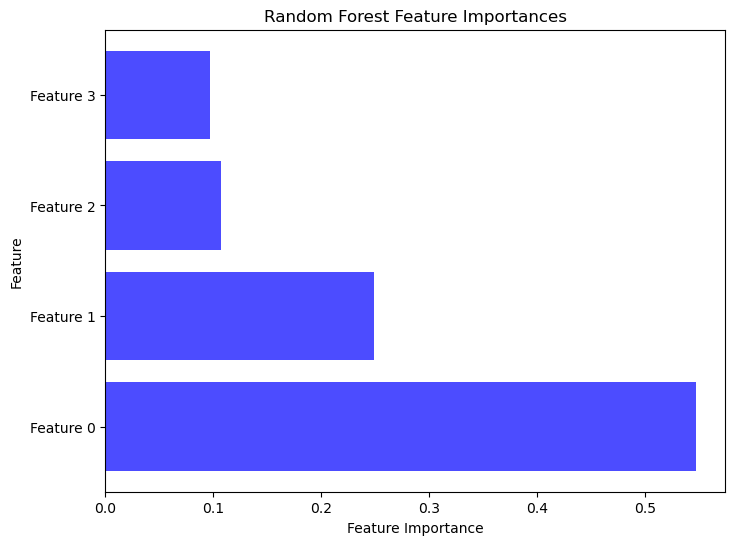

In [82]:
# Feature importances for Random Forest
rf_importances = [0.5469516134956479, 0.24932797317571181, 0.106955563974054, 0.09676484935458637]
feature_names = ['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3']

plt.figure(figsize=(8, 6))
plt.barh(feature_names, rf_importances, color='b', alpha=0.7)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')

plt.show()

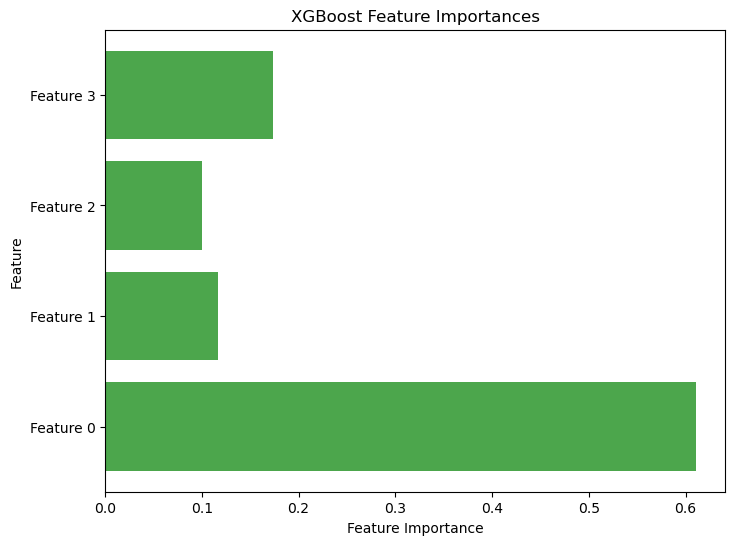

In [83]:
# Feature importances for XGBoost
xgb_importances = [0.6103460192680359, 0.11636998504400253, 0.10030073672533035, 0.172983318567276]
feature_names = ['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3']

plt.figure(figsize=(8, 6))
plt.barh(feature_names, xgb_importances, color='g', alpha=0.7)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')

plt.show()

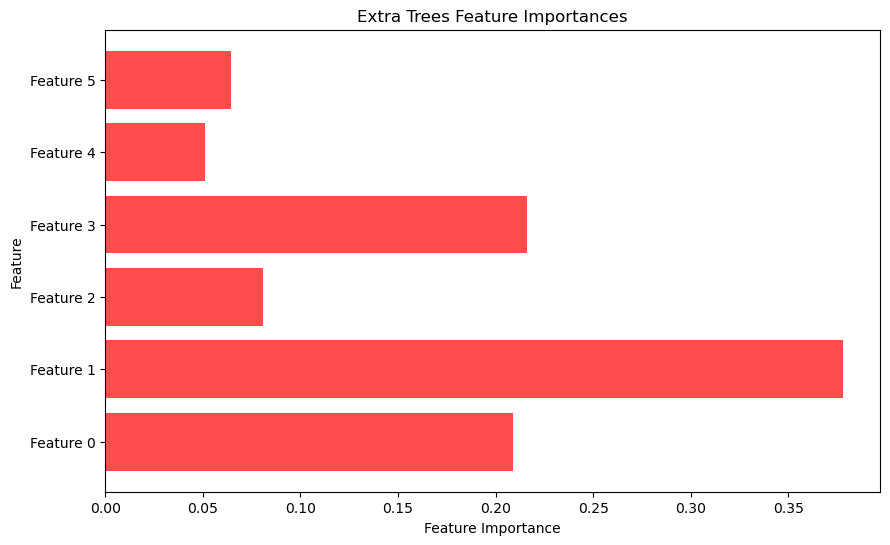

In [84]:
# Feature importances for Extra Trees
et_importances = [0.20907050195780086, 0.3780602630542599, 0.08105326998268463, 0.21614678537434875, 0.05109476164794808, 0.06457441798295786]
feature_names = ['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']

plt.figure(figsize=(10, 6))
plt.barh(feature_names, et_importances, color='r', alpha=0.7)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Extra Trees Feature Importances')

plt.show()

In [44]:
# determining the best out of 3 classifiers
models = [
    ('Random Forest Classifier', rf_model),
    ('XGBoost Classifier', xgb_model),
    ('Extra Trees Classifier', extra_trees_model)
]

best_model = None
best_accuracy = 0.0

for model_name, model in models:
    # Perform cross-validation and compute accuracy
    scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy = scores.mean()

    # Print the accuracy for the current model
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Update the best model if the current model has higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Step 6: Fit the best model on the full training set and evaluate on the test set
best_model.fit(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
print(f"Best Model: {type(best_model).__name__}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Random Forest Classifier Accuracy: 0.8088
XGBoost Classifier Accuracy: 0.8077
Extra Trees Classifier Accuracy: 0.8516
Best Model: ExtraTreesClassifier
Test Accuracy: 0.7778


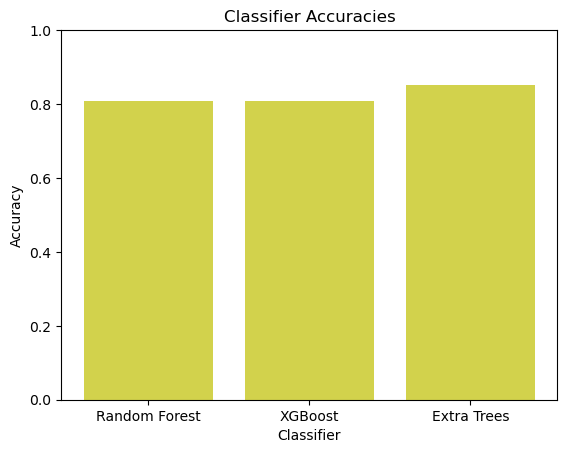

In [91]:
# Classifier names
classifiers = ['Random Forest', 'XGBoost', 'Extra Trees']

# Classifier accuracies
accuracies = [0.8088, 0.8077, 0.8516]

# Create a bar plot for classifier accuracies
plt.bar(classifiers, accuracies, color='y', alpha=0.7)

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')

plt.ylim(0, 1)  # Set the y-axis limits to better visualize the differences

plt.show()

In [85]:
# example input
new_data = [[12, 3, 4, 0, 2, 0], [23, 4, 3, 1, 1, 2], [70, 2, 1, 2, 0, 1]]
predictions = best_model.predict(new_data)

print("Predicted classes:")
print(predictions)

Predicted classes:
[0 2 2]
